In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Data.csv')

In [3]:
X = pd.DataFrame(np.c_[df['temperature'], df['humidity']], columns = ['temperature','humidity'])
y = df['output']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R-Squared: 0.2099
3.3346544873598716


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

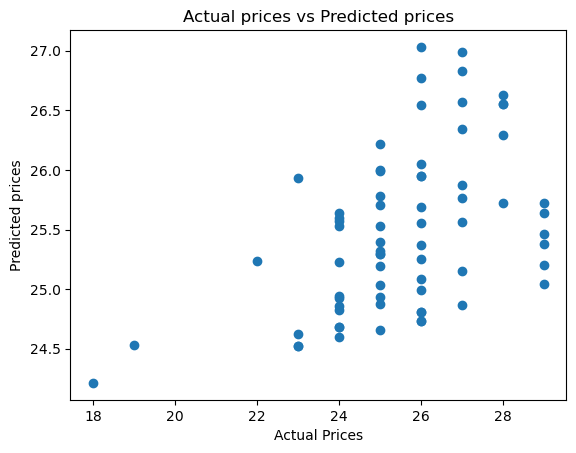

In [5]:
# Dự đoán trên tập kiểm tra

y_pred = model.predict(X_test)

# Đánh giá mô hình 
print('R-Squared: %.4f' % model.score(X_test,y_test))

mse = mean_squared_error(y_test, y_pred)
print(mse)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [6]:
temp=model.predict([[40,70]])
temp

C:\Users\nguye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.30064316])

In [12]:
import pickle
#---save the model to disk---
filename = 'temp.sav'
#---write to the file using write and binary mode---
pickle.dump(model, open(filename, 'wb'))

In [13]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

In [14]:
temp = 40
humidity = 70
prediction = loaded_model.predict([[temp, humidity]])
print(prediction)

[25.30064316]


C:\Users\nguye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
#client truy cập 
import json
import requests
def predict_temp(temperature, humidity):
    url = 'http://127.0.0.1:5000/temp/v1/predict'
    data = {"temperature":temperature, "humidity":humidity}
    data_json = json.dumps(data)
    headers = {'Content-type':'application/json'}
    response = requests.post(url, data=data_json, headers=headers)
    result = json.loads(response.text)
    return result
if __name__ == "__main__":
    prediction = predict_temp(42,65)
    print(prediction)

{'prediction': 24}
